<a href="https://colab.research.google.com/github/Ravikiit/Quantative_Analysis/blob/main/PART7_8_Monte_Carlo_Euler_Discretization_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
data = pd.read_csv('PG_2007_2017.csv', index_col = 'Date')

In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,PG
Date,
2017-04-04,0.002562
2017-04-05,0.000667
2017-04-06,-0.006356
2017-04-07,-0.001903
2017-04-10,0.002910


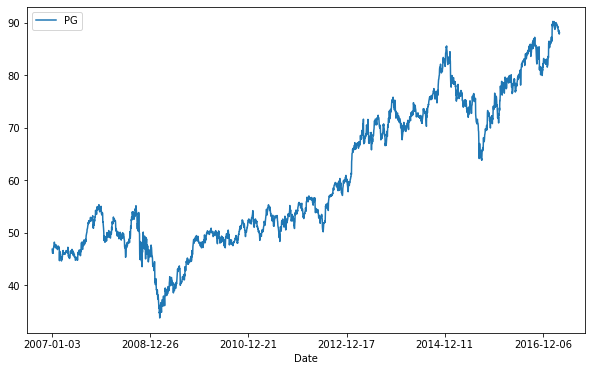

In [5]:
data.plot(figsize=(10, 6));

In [6]:
r = 0.025

In [7]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176109
dtype: float64

In [8]:
type(stdev)

pandas.core.series.Series

In [9]:
stdev = stdev.values
stdev

array([0.17610875])

In [10]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  


In [23]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in xrange (1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

NameError: ignored

In [12]:
S

array([[88.118629, 88.118629, 88.118629, ..., 88.118629, 88.118629,
        88.118629],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]])

In [15]:
S.shape

(251, 10000)

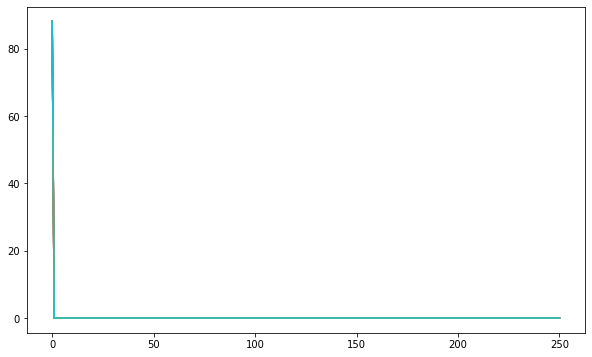

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

In [17]:
p = np.maximum(S[-1] - 110, 0)

In [18]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
p.shape

(10000,)

In [20]:
C = np.exp(-r * T) * np.sum(p) / iterations
C 

0.0